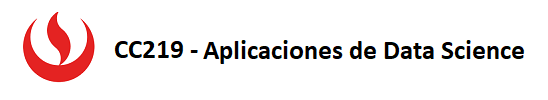

<h3 align="center"><b>TA2:</b> NLP: Normalización de textos y creación de Bolsa de Palabras </h3>
<h3 align="center">2023-2</h3>




---


**Nombre del Alumno:**  Luis Felipe Poma Astete

**Código:**  u202110902


---



### **NLP: Normalización de textos y creación de Bolsa de Palabras**

* El corpus que se normalizará consiste en una serie de artículos obtenidos de la web "https://www.elmundotoday.com/".


* Estos artículos se normalizaron previamente en la TA1, desde el fichero csv **corpus_mundo_today.csv**.  Como resultado de la TA1, se ha generado un nuevo corpus **corpus_llista_mundo_today.csv** fichero csv que contiene 52 filas, donde cada una de ellas representa un artículo y cada columna sus tokens.

* El ejercicio consiste en terminar de Normalizar este ***Corpus*** y crear la Bolsa de Palabras

Puede utilizar indistintamente las librerias **NLTK** y **Spacy** para el preprocesamiento (normalización) del texto.


### **I. Ejercicio de Normalización solicitado:**

* Dada una lista de listas en la que cada elemento de la misma tiene el contenido tokenizado de cada documento del corpus se pide:
<span></span><br><br>
   
    1. **Crear una función que elimine los tokens no alfabeticos y menores a dos digitos.**
        * **input**: lista de listas, en la que cada lista contiene los tokens del documento.
        * **output**: lista de listas, en la que cada lista contiene los tokens del documento.
<span></span><br><br>
   

### **II. Ejercicios de BoW solicitados:**
* Finalizada la normalización anterior, se pide:

    2. **Crear una función que dada una lista de documentos (*corpus*) tokenizados, elimine del corpus aquellos tokens que aparecen menos de 'N' veces (N=10) en el corpus** (ejercicio no completado en la TA1)
        * **input**: lista de listas, en la que cada lista contiene los tokens del documento normalizados.
        * **input**: 'N' -> Parámetro que nos indica el número mínimo de apariciones de la palabra en el corpus.
        * **output**: lista de listas, en la que cada lista contiene los tokens del documento normalizados.

    3. **Dado el corpus, normalizado y con tokens que aparecen 10 veces o más en el corpus, se pide crear una bolsa de palabras en ONE-HOT-ENCODE con Gensim**

    4. **Dado el corpus, normalizado y con tokens que aparecen 10 veces o más en el corpus, se pide crear una bolsa de palabras aplicando el TF-IDF con Scikit**

    5. **Crear una función que dada una lista de documentos (*corpus*) tokenizados, devuelva un arreglo con las frecuencia de cada uno de los tokens unicos por documento.  Utilice la estrategia de Vector de Frecuencias con Sklearn**
    
        * **input**: lista de listas, en la que cada lista contiene los tokens del documento normalizados.
        * **output**: arreglo, en la que las filas representan a cada documento del corpus y las columnas el número de apariciones de las palabras (tokens) unicas en cada documento.
    
    

<span></span><br><br>  

<hr>

## **Ejercicio de Normalización:**

* Leemos un conjunto de documentos ya tokenizados desde un archivo csv y los pasamos a una lista de listas llamada **corpus**

* De aquí en adelante trabajar con la variable **corpus**

## **Configuracion inicial**

In [66]:
#Cargar el corpus desde un archivo csv a una lista de listas
import csv

myFile = open('corpus_llista_mundo_today.csv', 'r')
reader = csv.reader(myFile)
corpus = []
for record in reader:
    corpus.append(record)

corpus = corpus[1:] # Elimino la cabecera del fichero

In [67]:
#Retorna una lista conteniendo los totales de tokens por documento
def tokens_por_corpus(corpus):
  tot_tokens_doc = []
  for i in range(len(corpus)):
    tot_tokens_doc.append(len(corpus[i]))
  return tot_tokens_doc

In [68]:
#Visualizamos el total de documentos y tokens en el corpus
print("El corpus cargado (lista de lista de tokes) es: ", corpus[0])
print("Cantidad de documentos: ", len(corpus))
print("Total de tokens en todo el corpus: ", sum((tokens_por_corpus(corpus))))

El corpus cargado (lista de lista de tokes) es:  ['gobierno', 'espaÃ±ol', 'sumar', 'junquera', 'condena', 'cumplir', 'puigdemont', 'revÃ©s', 'recibido', 'gobierno', 'espaÃ±a', 'puesto', 'libertad', 'carl', 'puigdemont', 'justicia', 'alemÃ¡n', 'juez', 'pablo', 'llarÃ©n', 'decidido', 'semana', 'instancia', 'ejecutivo', 'sumar', 'oriol', 'junquera', 'condena', 'cumplir', 'lÃ\xadder', 'pdecat', 'exvicepresidente', 'cataluÃ±a', 'permanecer', 'prisiÃ³n', 'madrileÃ±o', 'estremero', 'noviembre', 'asumir', 'delito', 'atribuido', 'carl', 'puigdemont', 'tribunal', 'supremo', 'asegurar', 'acto', 'expresidente', 'catalÃ¡n', 'legislatura', 'quedar', 'impÃºn', 'junquera', 'pagar', 'maniobra', 'ideado', 'burlar', 'justicia', 'alemÃ¡n', 'lÃ\xadder', 'esquerra', 'republicano', 'enfrentar', '50', 'aÃ±o', 'prisiÃ³n', 'seguir', 'junquera', 'caer', 'cien', 'aÃ±o', 'parar', 'carl', 'puigdemont', 'alemania', 'harÃ©', 'junquera', 'sacrificar', 'asumirÃ©', 'resignaciÃ³n', 'determinaciÃ³n', 'prometido', 'seguim'

In [69]:
#Quien utilice spacy, debe instalar
#Instalamos spacy y cargamos su modelo en español en la variable nlp
# %pip install spacy
# %python -m spacy download es
import spacy

nlp = spacy.load('es_core_news_sm')

In [70]:
#Quien utilice NLTK debe instalar lo siguiente
# !pip install -q wordcloud
import wordcloud
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pms_l\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pms_l\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pms_l\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pms_l\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pms_l\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [71]:
# Para generar BoW con One-Hot-Encoder instalar
# %pip install --upgrade gensim

## **Ahora desarrolla tu solución**

#### 1. **Crear una función que elimine los tokens no alfabeticos y menores a dos digitos.** (4ptos)

* **input**: lista de listas, en la que cada lista contiene los tokens del documento.
* **output**: lista de listas, en la que cada lista contiene los tokens del documento.

In [72]:
def remove_noalpha(corpus: list[list[str]]):
    for i in range(len(corpus)):
        element = nlp(" ".join(corpus[i]))
        corpus[i] = [word.text for word in element if not word.is_stop or word.__len__() < 2]
    return corpus

In [73]:
#Ejecuto la funcion creada y actualizo el corpus, ahora ya no contiene tokens no alfabeticos y estos son mayores a 2 digitos
corpus = remove_noalpha(corpus)

#### Luego de ejecutar esta función podemos ver como reducimos las palabras (tokens) del corpus original, quedandonos con lo importante y normalizado:

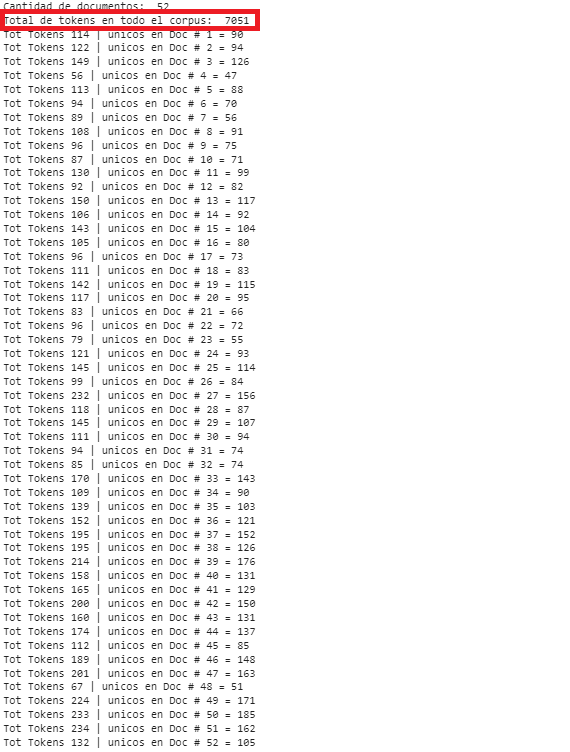

In [74]:
#Visualizamos el detalle del corpus luego de la remocion de tokens no alfabeticos
print("El corpus cargado (lista de lista de tokes) es: ", corpus[0])
print("Cantidad de documentos: ", len(corpus))
print("Total de tokens en todo el corpus: ", sum((tokens_por_corpus(corpus))))
for i in range (len(corpus)):
  print("Tot Tokens", len(corpus[i]), "| unicos en Doc #",i+1,"=", len(set(corpus[i])))

El corpus cargado (lista de lista de tokes) es:  ['gobierno', 'espaÃ±ol', 'sumar', 'junquera', 'condena', 'cumplir', 'puigdemont', 'revÃ', '©', 's', 'recibido', 'gobierno', 'espaÃ±a', 'puesto', 'libertad', 'carl', 'puigdemont', 'justicia', 'alemÃ¡n', 'juez', 'pablo', 'llarÃ', '©', 'n', 'decidido', 'semana', 'instancia', 'ejecutivo', 'sumar', 'oriol', 'junquera', 'condena', 'cumplir', 'lÃ\xadder', 'pdecat', 'exvicepresidente', 'cataluÃ±a', 'permanecer', 'prisiÃ³n', 'madrileÃ±o', 'estremero', 'noviembre', 'asumir', 'delito', 'atribuido', 'carl', 'puigdemont', 'tribunal', 'supremo', 'asegurar', 'acto', 'expresidente', 'catalÃ¡n', 'legislatura', 'quedar', 'impÃºn', 'junquera', 'pagar', 'maniobra', 'ideado', 'burlar', 'justicia', 'alemÃ¡n', 'lÃ\xadder', 'esquerra', 'republicano', 'enfrentar', '50', 'aÃ±o', 'prisiÃ³n', 'seguir', 'junquera', 'caer', 'cien', 'aÃ±o', 'parar', 'carl', 'puigdemont', 'alemania', 'harÃ', '©', 'junquera', 'sacrificar', 'asumirÃ', '©', 'resignaciÃ³n', 'determinaciÃ³n

## **Ejercicios de Bolsa de Palabras (BoW):**

#### 2. **Crear una función que dada una lista de documentos (*corpus*) tokenizados, elimine del corpus aquellos tokens que aparecen menos de 'N' veces (N=10) en el corpus** (4ptos)

Nota: Este ejercicio no fue completado en la TA1

* **input**: lista de listas, en la que cada lista contiene los tokens del documento normalizados.
* **input**: 'N' -> Parámetro que nos indica el número mínimo de apariciones de la palabra en el corpus.
* **output**: lista de listas, en la que cada lista contiene los tokens del documento normalizados.

In [81]:
import gensim

def drop_less_frecuency_words(corpus: list[list[str]], n: int):
    dictionary = gensim.corpora.Dictionary(corpus)
    dictionary.filter_extremes(no_below=n)
    # return the corpus (tokens) fitler 
    new_corpus: list = [dictionary.doc2bow(doc) for doc in corpus]
    # id to word
    id2word = {v: k for k, v in dictionary.token2id.items()}
    # return the corpus (words) fitler
    new_corpus = [[id2word[id] for id, freq in doc] for doc in new_corpus]
    
    return new_corpus

corpus = drop_less_frecuency_words(corpus, 10)
print(corpus[0])

['asegurar', 'aÃ±o', 'catalÃ¡n', 'espaÃ±a', 'espaÃ±ol', 'gobierno', 'lÃ\xadder', 'quedar', 's', 'seguir', 'semana']


#### 3. **Dado el corpus, normalizado y con tokens que aparecen 10 veces o más en el corpus, se pide crear una bolsa de palabras en ONE-HOT-ENCODE con Gensim** (4ptos)


In [92]:
import nltk
def tokenize(text):
    for token in nltk.word_tokenize(text):
        yield token


def vectorize(corpus):
    return list(
        map(lambda document: {tokens: "True" for tokens in tokenize(document)}, corpus)
    )


vectors = list(map(vectorize, corpus))

# Resultados
for v in vectors:
    print(v)

[{'asegurar': 'True'}, {'aÃ±o': 'True'}, {'catalÃ¡n': 'True'}, {'espaÃ±a': 'True'}, {'espaÃ±ol': 'True'}, {'gobierno': 'True'}, {'lÃ\xadder': 'True'}, {'quedar': 'True'}, {'s': 'True'}, {'seguir': 'True'}, {'semana': 'True'}]
[{'aÃ±o': 'True'}, {'gobierno': 'True'}, {'lÃ\xadder': 'True'}, {'seguir': 'True'}, {'semana': 'True'}, {'ciudadano': 'True'}, {'demostrar': 'True'}, {'madrid': 'True'}, {'pasar': 'True'}]
[{'asegurar': 'True'}, {'aÃ±o': 'True'}, {'espaÃ±a': 'True'}, {'espaÃ±ol': 'True'}, {'gobierno': 'True'}, {'lÃ\xadder': 'True'}, {'ciudadano': 'True'}, {'demostrar': 'True'}, {'equipo': 'True'}, {'importante': 'True'}, {'jugar': 'True'}, {'liga': 'True'}, {'mariano': 'True'}, {'maÃ±ana': 'True'}, {'paÃ\xads': 'True'}, {'pÃºblico': 'True'}, {'rajoy': 'True'}]
[{'asegurar': 'True'}, {'espaÃ±a': 'True'}, {'espaÃ±ol': 'True'}, {'gobierno': 'True'}, {'lÃ\xadder': 'True'}, {'madrid': 'True'}, {'maÃ±ana': 'True'}, {'empezar': 'True'}, {'hora': 'True'}]
[{'asegurar': 'True'}, {'catalÃ¡n

#### 4. **Dado el corpus, normalizado y con tokens que aparecen 10 veces o más en el corpus, se pide crear una bolsa de palabras aplicando el TF-IDF con Scikit** (4ptos)

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
bow_ftidf = list(map(lambda document: tfidf.fit_transform(document).toarray(),corpus))  # type: ignore

# Resultados
print(tfidf.get_feature_names_out())
print(bow_ftidf)

['aficionado' 'barcelona' 'catalã' 'deber' 'der' 'espaã' 'lã' 'madrid'
 'mariano' 'presidente' 'psoe' 'quedar' 'rajoy' 'real' 'semana']
[array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.64974816,
        0.        , 0.        , 0.76014955, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.

 #### 5. **Crear una función que dada una lista de documentos (*corpus*) tokenizados, devuelva un arreglo con las frecuencia de cada uno de los tokens unicos por documento.  Utilice la estrategia de Vector de Frecuencias con Sklearn** (4ptos)
    
 * **input**: lista de listas, en la que cada lista contiene los tokens del documento normalizados.
 * **output**: arreglo, en la que las filas representan a cada documento del corpus y las columnas el número de apariciones de las palabras (tokens) unicas en cada documento.

In [103]:
from sklearn.feature_extraction.text import CountVectorizer  
# flatten corpus
def flatten_corpus(corpus):
    return [" ".join(document) for document in corpus]

  
def bow_sklearn(corpus):
    vectorizer = CountVectorizer()
    arr_bow_sklearn = vectorizer.fit_transform(flatten_corpus(corpus)).toarray()
    
    return arr_bow_sklearn

In [105]:
#Visualizamos el BoW como Vector de frecuencias
arr_bow_corpus = bow_sklearn(corpus)

for i in range(len(arr_bow_corpus)):
    print("Doc #", i+1, ":", arr_bow_corpus[i])

Doc # 1 : [0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0]
Doc # 2 : [0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
Doc # 3 : [0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 2 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Doc # 4 : [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 2 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Doc # 5 : [0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Doc # 6 : [0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Doc # 7 : [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 